In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import joblib
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,f1_score,roc_auc_score,accuracy_score,recall_score,precision_score,make_scorer

In [19]:
df=pd.read_csv(r"C:\Users\hp\Downloads\telecom_customer_churn (1).csv")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [23]:
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

<Axes: >

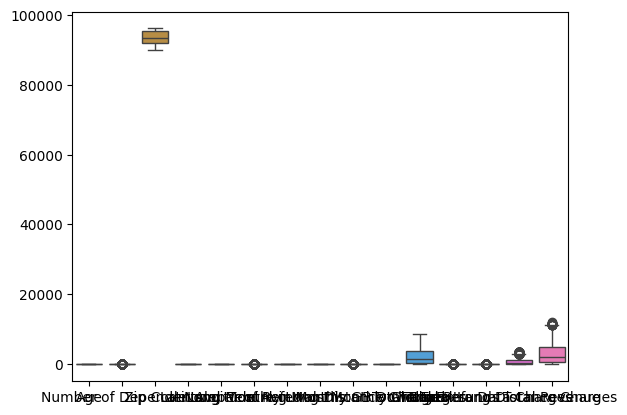

In [25]:
sns.boxplot(df)

In [39]:
for i in df:
    if df[i]. dtypes in ['int64','float64']:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        ul=q3+1.5*iqr
        ll=q1-1.5*iqr
        df[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

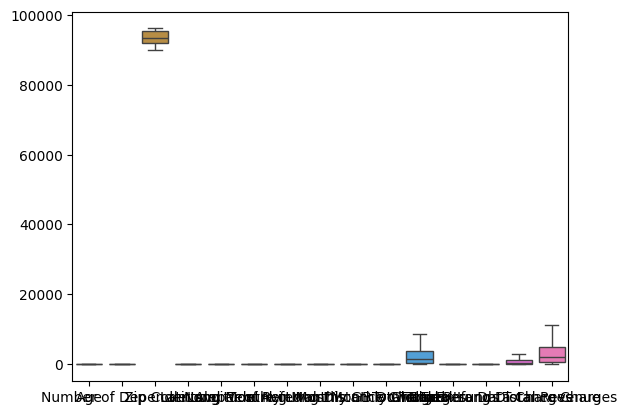

In [41]:
sns.boxplot(df)

In [43]:

df['Avg Monthly Long Distance Charges'].fillna(df['Avg Monthly Long Distance Charges'].mean(),inplace=True)

In [45]:
i=['Offer','Multiple Lines' ,'Internet Type','Avg Monthly GB Download','Online Security','Online Backup' ,'Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data ']
for i in df:
     df[i].fillna(df[i].mode()[0],inplace=True)

In [49]:
df.isna().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

In [53]:
df_num=df.select_dtypes(include=np.number)

In [67]:
df_num.columns

Index(['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',
       'Number of Referrals', 'Tenure in Months',
       'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [287]:
df_num.head()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,37,0,2.0,9,42.39,16.0,65.6,593.30,0.0,0,381.51,974.81
1,46,0,0.0,9,10.69,10.0,-4.0,542.40,0.0,0,96.21,610.28
2,50,0,0.0,4,33.65,30.0,73.9,280.85,0.0,0,134.60,415.45
3,78,0,1.0,13,27.82,4.0,98.0,1237.85,0.0,0,361.66,1599.51
4,75,0,3.0,3,7.38,11.0,83.9,267.40,0.0,0,22.14,289.54


In [293]:
df_num['Total Extra Data Charges'].value_counts()


Total Extra Data Charges
0    7043
Name: count, dtype: int64

In [325]:
Df_num=df_num.drop(['Number of Dependents','Total Extra Data Charges','Total Refunds'],axis=1)

In [327]:
len(Df_num.columns)

9

In [299]:
df_catt=df.select_dtypes(include=object)
len(df_catt.columns)

23

In [301]:
df_catt.columns

Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [303]:
df_num.drop(['Zip Code', 'Latitude', 'Longitude'],axis=1,inplace=True)
df_num.columns

KeyError: "['Zip Code', 'Latitude', 'Longitude'] not found in axis"

In [305]:

len(df_catt.columns)

23

In [307]:
df_catt['Customer Status'].value_counts()

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

In [309]:
df_catt['Customer Status']=df_cat['Customer Status'].replace({'Stayed':0,'Churned':1,'Joined':0})

In [311]:
df_catt['Customer Status'].value_counts()

Customer Status
0    5174
1    1869
Name: count, dtype: int64

In [313]:
df_catt.columns

Index(['Customer ID', 'Gender', 'Married', 'City', 'Offer', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [315]:
df_catt['Churn Category'].value_counts()

Churn Category
Competitor         6015
Dissatisfaction     321
Attitude            314
Price               211
Other               182
Name: count, dtype: int64

In [231]:
df_catt['Churn Reason'].value_counts()

Churn Reason
Competitor had better devices                5486
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                          46
Extra data charges                             39
Limited range of services                      37
Poor expertise of online support               31
Lack of affordable download/upload speed       30
Lack of self-service on Website                29
Poor expertise of phone support                12
Deceased                             

In [249]:
df_catt.drop(['Churn Reason','Customer ID'],axis=1,inplace=True)
df_catt.columns

Index(['Gender', 'Married', 'City', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Customer Status',
       'Churn Category'],
      dtype='object')

In [251]:
len(df_catt.columns)


21

In [253]:
df_catt_dummies=pd.get_dummies(df_catt,prefix="",prefix_sep="")
df_catt_dummies.head()

,Customer Status,Female,Male,No,Yes,Acampo,Acton,Adelanto,Adin,Agoura Hills,...,No,Yes,Bank Withdrawal,Credit Card,Mailed Check,Attitude,Competitor,Dissatisfaction,Other,Price
0,0,True,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,True,False,False,False
1,0,False,True,True,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False
2,1,False,True,True,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,False
3,1,False,True,False,True,False,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
4,1,True,False,False,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False


In [275]:
df_catt_dummies=df_catt_dummies.astype(int)

In [277]:
df_catt_dummies.columns

Index(['Customer Status', 'Female', 'Male', 'No', 'Yes', 'Acampo', 'Acton',
       'Adelanto', 'Adin', 'Agoura Hills',
       ...
       'No', 'Yes', 'Bank Withdrawal', 'Credit Card', 'Mailed Check',
       'Attitude', 'Competitor', 'Dissatisfaction', 'Other', 'Price'],
      dtype='object', length=1154)

In [279]:
len(df_catt_dummies.columns)

1154

In [281]:
df_catt_dummies.head()

,Customer Status,Female,Male,No,Yes,Acampo,Acton,Adelanto,Adin,Agoura Hills,...,No,Yes,Bank Withdrawal,Credit Card,Mailed Check,Attitude,Competitor,Dissatisfaction,Other,Price
0,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [335]:
combinedDf=pd.concat([Df_num,df_catt_dummies],axis=1)
combinedDf.head()

,Age,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,Customer Status,...,No,Yes,Bank Withdrawal,Credit Card,Mailed Check,Attitude,Competitor,Dissatisfaction,Other,Price
0,37,2.0,9,42.39,16.0,65.6,593.30,381.51,974.81,0,...,0,1,0,1,0,0,1,0,0,0
1,46,0.0,9,10.69,10.0,-4.0,542.40,96.21,610.28,0,...,1,0,0,1,0,0,1,0,0,0
2,50,0.0,4,33.65,30.0,73.9,280.85,134.60,415.45,1,...,0,1,1,0,0,0,1,0,0,0
3,78,1.0,13,27.82,4.0,98.0,1237.85,361.66,1599.51,1,...,0,1,1,0,0,0,0,1,0,0
4,75,3.0,3,7.38,11.0,83.9,267.40,22.14,289.54,1,...,0,1,0,1,0,0,0,1,0,0


In [337]:

from sklearn.model_selection import train_test_split
x=combinedDf.drop(['Customer Status'],axis=1)
y=combinedDf['Customer Status']

X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [341]:
from sklearn.linear_model import RidgeClassifier,Ridge
model=RidgeClassifier(alpha=2)
model.fit(X_train,y_train)

,alpha,2
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,class_weight,None
,solver,'auto'
,positive,False
,random_state,None


In [347]:
model.intercept_

array([0.28199726])

In [349]:
model.coef_

array([ 0.00194533, -0.0442655 , -0.00070291, ...,  0.27971809,
        0.19811816,  0.33036529])

In [351]:
model.coef_.ravel()

array([ 0.00194533, -0.0442655 , -0.00070291, ...,  0.27971809,
        0.19811816,  0.33036529])

In [381]:
coefs=pd.DataFrame(list(model.coef_.ravel()),list(model.feature_names_in_)).reset_index()
coefs.columns=['features','coefficients']
coefs

,features,coefficients
0,Age,0.001945
1,Number of Referrals,-0.044265
2,Tenure in Months,-0.000703
3,Avg Monthly Long Distance Charges,-0.000596
4,Avg Monthly GB Download,-0.000947
...,...,...
1157,Attitude,0.296764
1158,Competitor,-1.104965
1159,Dissatisfaction,0.279718
1160,Other,0.198118


In [387]:
Train=pd.concat([X_train,y_train],axis=1)
Train.head()

,Age,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,Female,...,Yes,Bank Withdrawal,Credit Card,Mailed Check,Attitude,Competitor,Dissatisfaction,Other,Price,Customer Status
877,23,2.0,44,36.86,55.5,20.0,860.85,1621.84,2482.69,0,...,0,1,0,0,0,1,0,0,0,0
5792,26,7.0,72,28.59,55.5,97.7,6869.70,2058.48,8928.18,1,...,1,0,1,0,0,1,0,0,0,0
5334,69,0.0,24,30.87,15.0,76.1,1712.70,740.88,2453.58,0,...,1,1,0,0,0,1,0,0,0,1
878,24,1.0,30,12.85,55.5,19.7,599.25,385.50,934.96,1,...,0,0,1,0,0,1,0,0,0,0
6578,70,0.0,26,19.21,15.0,78.8,2006.10,499.46,2505.56,1,...,1,1,0,0,0,1,0,0,0,0


In [389]:
Train['preds']=model.predict(X_train)

In [393]:
report=classification_report(Train['preds'],Train['Customer Status'])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      3925
           1       0.74      0.97      0.84      1005

    accuracy                           0.93      4930
   macro avg       0.87      0.94      0.90      4930
weighted avg       0.94      0.93      0.93      4930



In [395]:
Test=pd.concat([X_test,y_test],axis=1)
Test.head()

,Age,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,Female,...,Yes,Bank Withdrawal,Credit Card,Mailed Check,Attitude,Competitor,Dissatisfaction,Other,Price,Customer Status
4880,44,0.0,30,12.17,16.0,97.00,3021.30,365.10,3386.40,0,...,1,1,0,0,0,1,0,0,0,0
1541,22,7.5,9,30.46,55.5,-10.00,767.90,274.14,1042.04,0,...,1,1,0,0,0,1,0,0,0,0
1289,42,7.0,7,28.70,17.0,44.75,333.65,200.90,534.55,0,...,0,1,0,0,0,1,0,0,0,0
5745,52,0.0,4,47.82,13.0,74.35,265.35,191.28,456.63,0,...,1,1,0,0,1,0,0,0,0,1
4873,25,0.0,30,19.41,27.0,55.30,1530.60,582.30,2112.90,1,...,1,1,0,0,0,1,0,0,0,0


In [399]:
Test['preds']=model.predict(X_test)

In [401]:
report=classification_report(Test['Customer Status'],Test['preds'])
print(report)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1554
           1       0.95      0.68      0.79       559

    accuracy                           0.91      2113
   macro avg       0.92      0.83      0.87      2113
weighted avg       0.91      0.91      0.90      2113



#### lasso Classification

In [407]:
from sklearn.linear_model import LassoCV

In [411]:
TrainLasso=pd.concat([X_train,y_train],axis=1)
TrainLasso.head()

,Age,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue,Female,...,Yes,Bank Withdrawal,Credit Card,Mailed Check,Attitude,Competitor,Dissatisfaction,Other,Price,Customer Status
877,23,2.0,44,36.86,55.5,20.0,860.85,1621.84,2482.69,0,...,0,1,0,0,0,1,0,0,0,0
5792,26,7.0,72,28.59,55.5,97.7,6869.70,2058.48,8928.18,1,...,1,0,1,0,0,1,0,0,0,0
5334,69,0.0,24,30.87,15.0,76.1,1712.70,740.88,2453.58,0,...,1,1,0,0,0,1,0,0,0,1
878,24,1.0,30,12.85,55.5,19.7,599.25,385.50,934.96,1,...,0,0,1,0,0,1,0,0,0,0
6578,70,0.0,26,19.21,15.0,78.8,2006.10,499.46,2505.56,1,...,1,1,0,0,0,1,0,0,0,0


In [419]:
model2=LassoCV()
model2.fit(X_train,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,None
,verbose,False
,n_jobs,None


In [421]:
model2.intercept_

np.float64(0.20997103690725039)

In [427]:
model2.alpha_

np.float64(0.2773345345825323)

In [429]:
model2.coef_

array([ 0.00058637, -0.        , -0.00316696, ...,  0.        ,
        0.        ,  0.        ])

In [435]:
model2.coef_.ravel()

array([ 0.00058637, -0.        , -0.00316696, ...,  0.        ,
        0.        ,  0.        ])

In [459]:
Lasscoefs=pd.DataFrame(list(model2.feature_names_in_),list(model2.coef_.ravel())).reset_index()
Lasscoefs.columns=['Lassocoefficients','features']
Lasscoefs

,Lassocoefficients,features
0,0.000586,Age
1,-0.000000,Number of Referrals
2,-0.003167,Tenure in Months
3,0.000000,Avg Monthly Long Distance Charges
4,-0.001595,Avg Monthly GB Download
...,...,...
1157,0.000000,Attitude
1158,-0.000000,Competitor
1159,0.000000,Dissatisfaction
1160,0.000000,Other


In [469]:
TrainLasso['probabilty']=model2.predict(X_train)


In [471]:
TrainLasso['predicted']=np.where(TrainLasso['probabilty']>0.7,1,0)

In [473]:
report=classification_report(TrainLasso['predicted'],TrainLasso['Customer Status'])
print(report)

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      4922
           1       0.01      0.88      0.01         8

    accuracy                           0.74      4930
   macro avg       0.50      0.81      0.43      4930
weighted avg       1.00      0.74      0.85      4930



In [483]:
LassoTest=pd.concat([X_test,y_test],axis=1)
LassoTest['probabilty']=model2.predict(X_test)

In [485]:
LassoTest['predicted']=np.where(LassoTest['probabilty']>0.7,1,0)

In [487]:
report=classification_report(LassoTest['predicted'],LassoTest['Customer Status'])
print(report)

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      2112
           1       0.00      1.00      0.00         1

    accuracy                           0.74      2113
   macro avg       0.50      0.87      0.43      2113
weighted avg       1.00      0.74      0.85      2113



#### submisison

In [490]:
TrainLasso[['predicted','Customer Status']].head()

,predicted,Customer Status
877,0,0
5792,0,0
5334,0,1
878,0,0
6578,0,0
